<a href="https://colab.research.google.com/github/ChenshuLiu/Deep-Learning-with-R/blob/main/Flora_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow opencv-python matplotlib
#!pip install scikit-image
#!pip install scipy
#!pip list
import sys
import skimage
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from skimage import io
from pathlib import Path
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model

Found 567 files belonging to 5 classes.


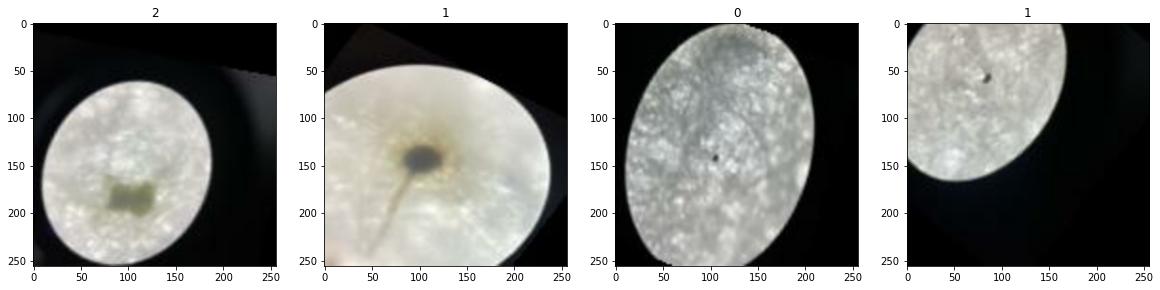

In [ ]:
aug_dir = '/content/drive/MyDrive/Flora Classification/Augmented_Images'
data = tf.keras.utils.image_dataset_from_directory(aug_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Preprocessing

In [ ]:
data = data.map(lambda x, y: (x/255, y))

train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(val_size)

#DNN - Inception-v5

In [ ]:
input_img = Input(shape=(256, 256, 3))

### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

flat_1 = Flatten()(mid_1)

dense_1 = Dense(200, activation='relu')(flat_1)
dense_2 = Dense(100, activation='relu')(dense_1)
dense_3 = Dense(50, activation='relu')(dense_2)
output = Dense(1, activation='softmax')(dense_3)

model_1 = Model([input_img], output)

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 256, 256, 10  40          ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 256, 256, 10  40          ['input_2[0][0]']                
                                )                                                           

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model_1.fit(train, epochs=10, validation_data=val, batch_size = 10, callbacks=[tensorboard_callback])

Epoch 1/10
12/12 [==============================] - 7s 262ms/step - loss: 0.0000e+00 - accuracy: 0.3281 - val_loss: 0.0000e+00 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 3s 246ms/step - loss: 0.0000e+00 - accuracy: 0.3203 - val_loss: 0.0000e+00 - val_accuracy: 0.3438
Epoch 3/10
12/12 [==============================] - 3s 245ms/step - loss: 0.0000e+00 - accuracy: 0.3281 - val_loss: 0.0000e+00 - val_accuracy: 0.3542
Epoch 4/10
12/12 [==============================] - 3s 250ms/step - loss: 0.0000e+00 - accuracy: 0.3385 - val_loss: 0.0000e+00 - val_accuracy: 0.3646
Epoch 5/10
12/12 [==============================] - 3s 255ms/step - loss: 0.0000e+00 - accuracy: 0.3385 - val_loss: 0.0000e+00 - val_accuracy: 0.2812
Epoch 6/10
12/12 [==============================] - 3s 247ms/step - loss: 0.0000e+00 - accuracy: 0.3385 - val_loss: 0.0000e+00 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 3s 249ms/step - loss: 0.0000e+00 - accuracy: 0.3

# Built-in CNNs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
aug_dir = '/content/drive/MyDrive/Flora Classification/Augmented_Images'
img_h, img_w = 256, 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    aug_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_h, img_w),
    batch_size = 32,
    label_mode = 'categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    aug_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_h, img_w),
    batch_size = 32,
    label_mode = 'categorical'
)

Found 567 files belonging to 5 classes.
Using 454 files for training.
Found 567 files belonging to 5 classes.
Using 113 files for validation.


TypeError: ignored

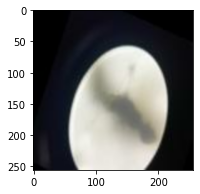

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")
plt.show()

In [4]:
Resnet_imnet = Sequential()
pretrained_model = tf.keras.applications.ResNet152(
    include_top=False,
    input_shape=(256, 256, 3),
    pooling='avg', classes = 5,
    weights = 'imagenet'
)
for layer in pretrained_model.layers:
        layer.trainable=False
Resnet_imnet.add(pretrained_model)
Resnet_imnet.add(Flatten())
Resnet_imnet.add(Dense(512, activation = 'relu'))
Resnet_imnet.add(Dense(5, activation = 'relu'))
Resnet_imnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 59,422,597
Trainable params: 1,051,653
Non-trainable params: 58,370,944
_________________________________________________________________


In [5]:
Resnet_imnet.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history = Resnet_imnet.fit(train_ds, validation_data=val_ds, epochs=7)

Epoch 1/7


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 179s 11s/step - loss: 4.3125 - accuracy: 0.3656 - val_loss: 4.0624 - val_accuracy: 0.4336
Epoch 2/7
15/15 [==============================] - 166s 11s/step - loss: 2.9369 - accuracy: 0.5639 - val_loss: 3.8885 - val_accuracy: 0.5841
Epoch 3/7
15/15 [==============================] - 168s 11s/step - loss: 2.6993 - accuracy: 0.6652 - val_loss: 3.7419 - val_accuracy: 0.5929
Epoch 4/7
15/15 [==============================] - 169s 11s/step - loss: 2.5605 - accuracy: 0.7489 - val_loss: nan - val_accuracy: 0.6726
Epoch 5/7
15/15 [==============================] - 169s 11s/step - loss: nan - accuracy: 0.3260 - val_loss: nan - val_accuracy: 0.3097
Epoch 6/7
15/15 [==============================] - 169s 11s/step - loss: nan - accuracy: 0.2467 - val_loss: nan - val_accuracy: 0.3097
Epoch 7/7
15/15 [==============================] - 167s 11s/step - loss: nan - accuracy: 0.2467 - val_loss: nan - val_accuracy: 0.3097
